In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../tables/disc_bench.txt", sep='\t')

In [4]:
def name_splitter(x):
    parts = x.split('_')
    rank = parts[0]
    base = parts[1].split('/')[1]
    comp = parts[2].split('/')[0]
    return [rank, base, comp]
f = data['name'].apply(name_splitter)
v = pd.DataFrame(f.to_list(), columns=['rank', 'base', 'disc'])
data = data.join(v)

In [16]:
data.head()

,TP-base,TP-call,FP,FN,precision,recall,f1,base cnt,call cnt,TP-call_TP-gt,TP-call_FP-gt,TP-base_TP-gt,TP-base_FP-gt,gt_concordance,name,rank,base,disc
0,38482,38482,2379,99649,0.941778,0.278591,0.429986,138131,40861,36795,1687,36795,1687,0.956161,rank0_bench/adotto_gangstr/summary.txt,rank0,adotto,gangstr
1,80922,80922,7073,57209,0.919620,0.585835,0.715725,138131,87995,77531,3391,77531,3391,0.958095,rank0_bench/adotto_hipstr/summary.txt,rank0,adotto,hipstr
2,103913,103913,33944,34218,0.753774,0.752279,0.753025,138131,137857,97686,6227,97686,6227,0.940075,rank0_bench/adotto_trgt/summary.txt,rank0,adotto,trgt
3,38474,38474,2387,99623,0.941582,0.278601,0.429978,138097,40861,36795,1679,36795,1679,0.956360,rank0_bench/thfa_gangstr/summary.txt,rank0,thfa,gangstr
4,80881,80881,7114,57216,0.919154,0.585683,0.715470,138097,87995,77508,3373,77508,3373,0.958297,rank0_bench/thfa_hipstr/summary.txt,rank0,thfa,hipstr


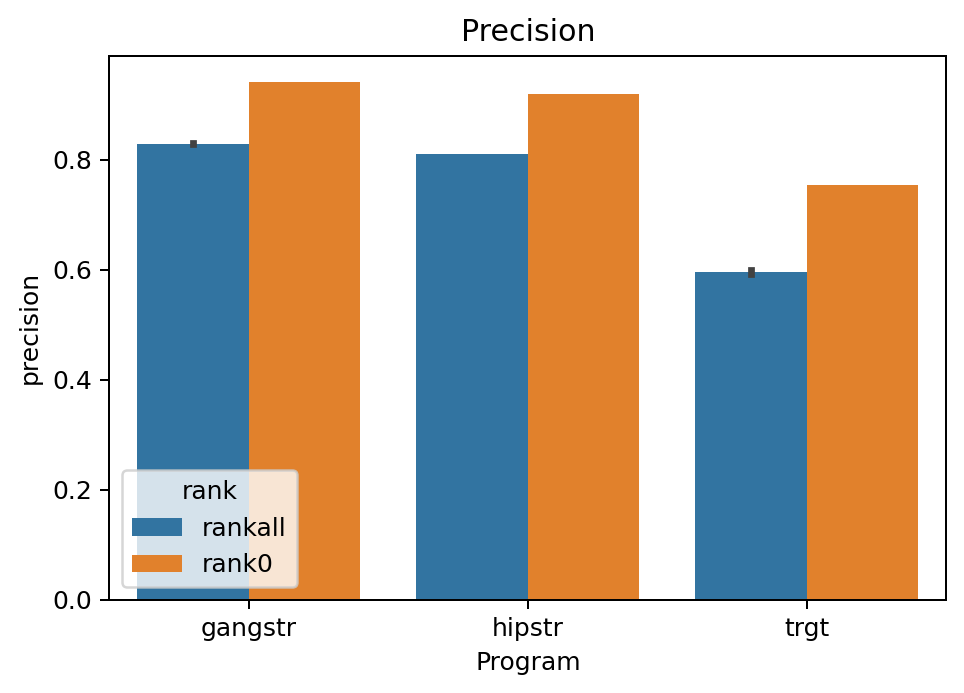

In [25]:
plt.figure(dpi=180)
p = sb.barplot(data=data, x="disc", y='precision', hue='rank', hue_order=['rankall', 'rank0'])
p.set(title="Precision", xlabel="Program")
plt.show()

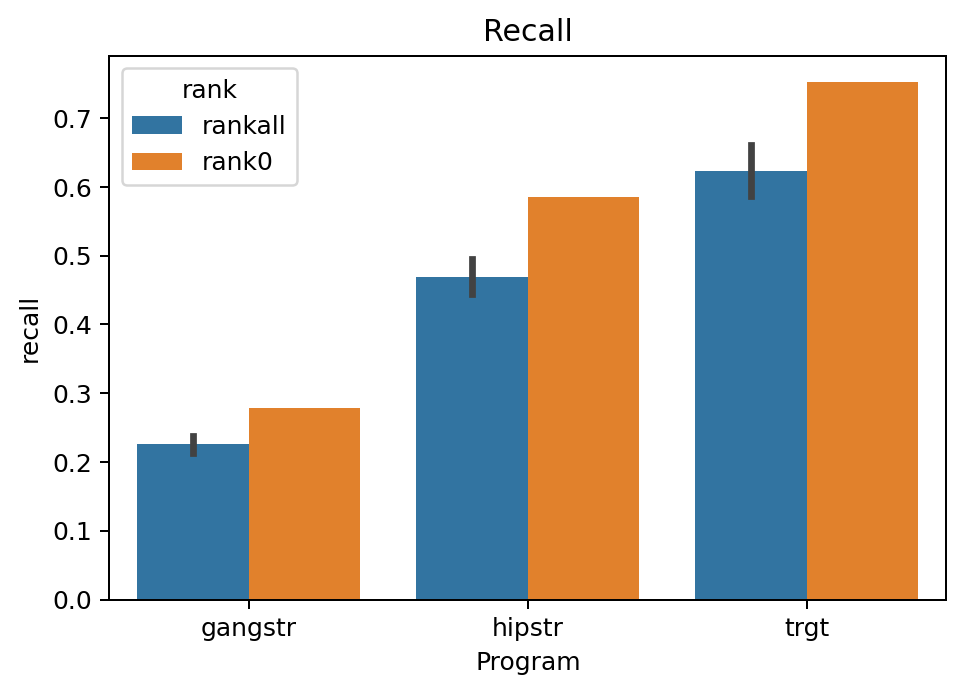

In [26]:
plt.figure(dpi=180)
p = sb.barplot(data=data, x="disc", y='recall', hue='rank', hue_order=['rankall', 'rank0'])
p.set(title="Recall", xlabel="Program")
plt.show()

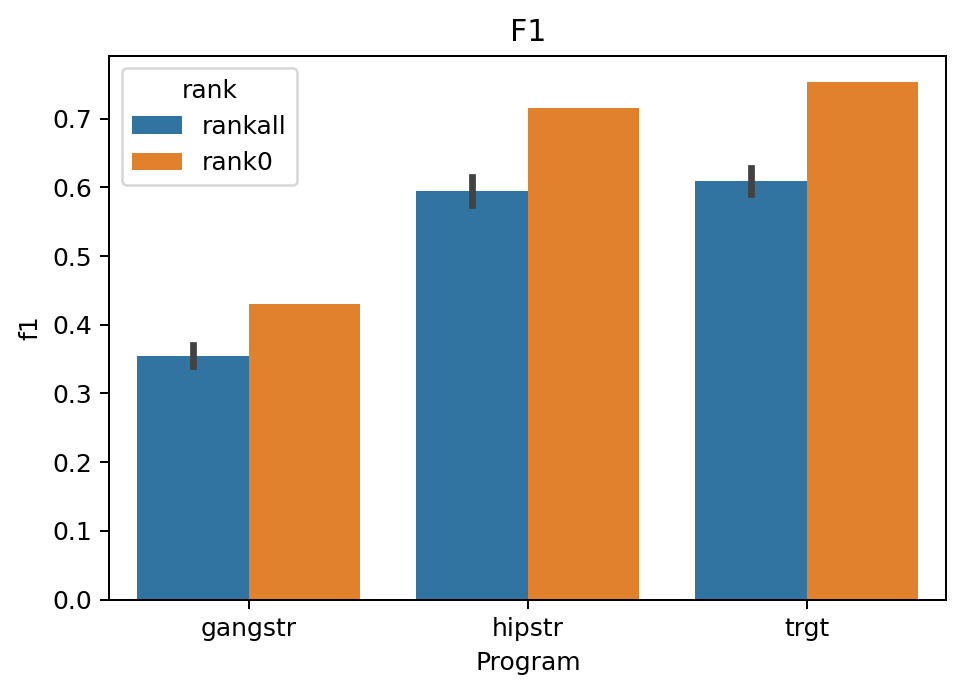

In [27]:
plt.figure(dpi=180)
p = sb.barplot(data=data, x="disc", y='f1', hue='rank', hue_order=['rankall', 'rank0'])
p.set(title="F1", xlabel="Program")
plt.show()

In [33]:
data[['disc', 'rank', 'base', 'TP-call', 'FP']].sort_values('disc')

,disc,rank,base,TP-call,FP
0,gangstr,rank0,adotto,38482,2379
3,gangstr,rank0,thfa,38474,2387
6,gangstr,rankall,adotto,43320,8885
9,gangstr,rankall,thfa,43216,8989
1,hipstr,rank0,adotto,80922,7073
4,hipstr,rank0,thfa,80881,7114
7,hipstr,rankall,adotto,89892,20950
10,hipstr,rankall,thfa,89914,20928
2,trgt,rank0,adotto,103913,33944
5,trgt,rank0,thfa,103984,33873


In [34]:
trgt = pd.read_csv("../tables/rank0_adotto_trgt_statelen.txt", sep='\t')

[Text(0.5, 1.0, 'Rank0 Adotto TRGT variant size'),
 Text(0, 0.5, 'Alt Len'),
 Text(0.5, 0, 'Ref Len')]

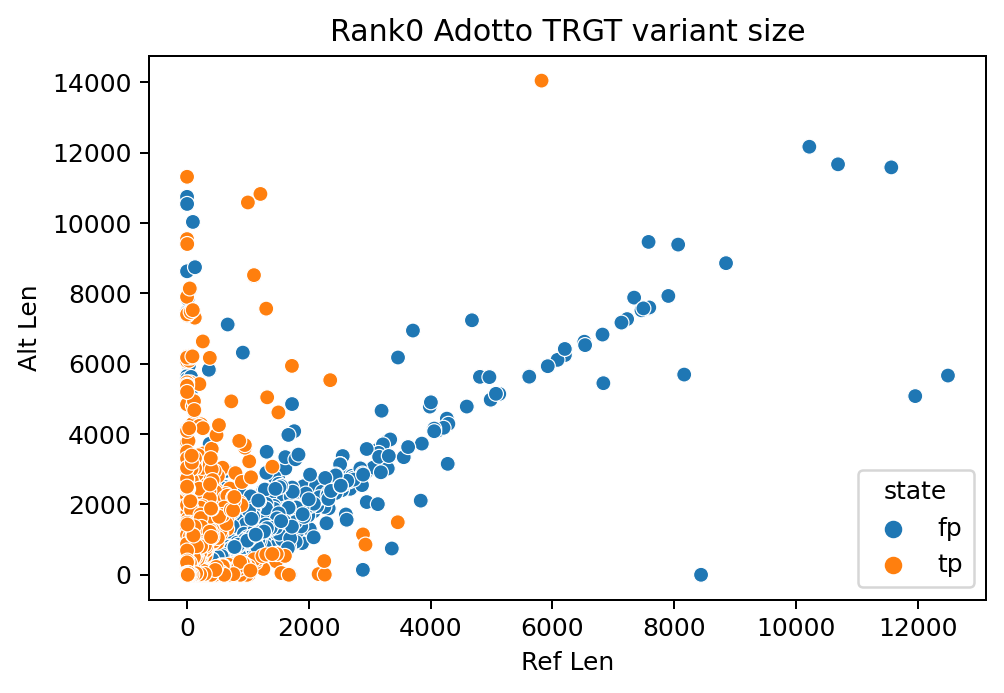

In [40]:
plt.figure(dpi=180)
p = sb.scatterplot(data=trgt[trgt['state'].isin(['fp', 'tp'])], x="ref", y="alt", hue="state")
#p.set(xscale='log', yscale='log')
p.set(title="Rank0 Adotto TRGT variant size", ylabel="Alt Len", xlabel="Ref Len")

In [46]:
trgt['diff'] = (view['ref'] - view['alt']).abs()
view = trgt[trgt['state'] == 'fp']
print(len(view[(view['ref'] >= 10) & (view['alt'] >= 10)]) / len(view))

print(len(view[(view['ref'] >= 10) & (view['alt'] >= 10) & (view['diff'] < 10)]) / len(view))


0.8683419750176762
0.32588970068347867


[(0.0, 50.0)]

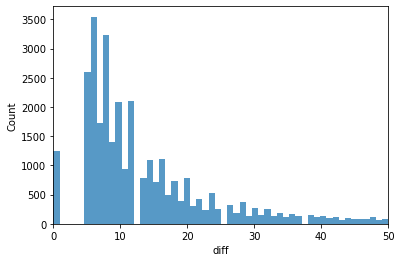

In [49]:
p = sb.histplot(view['diff'])
p.set(xlim=(0, 50))

# adotto trgt rank0 region counts

In [50]:
regcnt = pd.read_csv("../tables/rank0_adotto_trgt_regcnts.txt.gz", sep='\t')

In [52]:
len(regcnt)

116495

In [53]:
regcnt.head()

,chrom,start,end,tpb,tp,fn,fp
0,chr1,839268,839680,0,0,1,1
1,chr1,853385,853936,0,0,1,1
2,chr1,860153,860236,1,1,0,0
3,chr1,866415,867223,0,0,2,1
4,chr1,933935,934992,1,1,0,0


In [76]:
ftable = []
no_calls = (regcnt['tp'] == 0) & (regcnt['fp'] == 0)
ftable.append([no_calls.sum(), "no_calls"])
no_false = (regcnt['fn'] == 0) & (regcnt['fp'] == 0)
ftable.append([no_false.sum(), "no_false"])
both_false = (regcnt['fn'] != 0) & (regcnt['fp'] != 0)
ftable.append([both_false.sum(), "phab_cand"])

ftable.append([other.sum(), "other"])
ftable = pd.DataFrame(ftable, columns=["count", "state"])
ftable

regcnt['state'] = 0
regcnt.loc[no_calls, 'state'] += 1
regcnt.loc[no_false, 'state'] += 2
regcnt.loc[both_false, 'state'] += 4

In [79]:
regcnt['state'].value_counts()

2    83118
4    24593
0     6441
1     1702
3      641
Name: state, dtype: int64

In [81]:
regcnt['base_cnt'] = regcnt['tpb'] + regcnt['fn']
regcnt['comp_cnt'] = regcnt['tp'] + regcnt['fp']

In [83]:
view = regcnt.groupby('state')[['base_cnt', 'comp_cnt']].sum()
view['count'] = regcnt['state'].value_counts()
view

,base_cnt,comp_cnt,count
state,,,
0,8619,10758,6441
1,1931,0,1702
2,94719,94721,83118
3,1,0,641
4,32861,32378,24593


In [84]:
regcnt[regcnt['state'] == 4][['chrom', 'start', 'end']].to_csv("adotto_trgt_rank0_phab.bed", sep='\t', header=False, index=False)

In [88]:
atp_count = pd.read_csv("../tables/atp_counts.txt", sep='\t')

In [89]:
atp_count['match_pct'] = atp_count['true_count'] / (atp_count['true_count'] + atp_count['false_count'])

[Text(0.5, 1.0, 'Phab Variant Identity'),
 Text(0.5, 0, 'Identity Percent'),
 Text(0, 0.5, 'Region Count')]

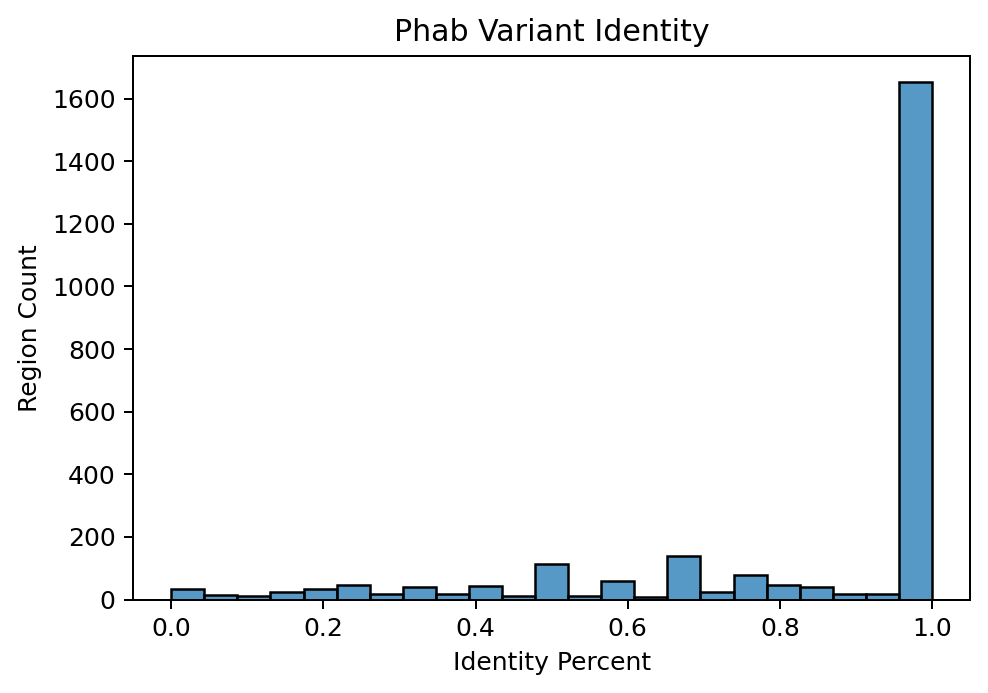

In [100]:
plt.figure(dpi=180)
p = sb.histplot(data=atp_count, x="match_pct")
p.set(title="Phab Variant Identity", xlabel="Identity Percent", ylabel="Region Count")

In [94]:
n = atp_count[atp_count['match_pct'] >= 0.90][['base_count', 'comp_count']].sum()
d = atp_count[['base_count', 'comp_count']].sum()
n / d

base_count    0.661604
comp_count    0.661604
dtype: float64

In [93]:
atp_count[['base_count', 'comp_count']].sum()

base_count    12444
comp_count    12444
dtype: int64

In [104]:
n

base_count    8233
comp_count    8233
dtype: int64

In [99]:
atp_count

,base_count,comp_count,true_count,false_count,match_pct
0,8,8,14,23,0.378378
1,3,3,3,0,1.000000
2,4,4,4,0,1.000000
3,3,3,3,0,1.000000
4,3,3,2,2,0.500000
...,...,...,...,...,...
2494,2,2,2,1,0.666667
2495,8,8,5,0,1.000000
2496,6,6,2,0,1.000000
2497,3,3,4,0,1.000000
